# INFO8010 - Project
## CycleGAN for style transfer
### ULiège - 2021

#### Antoine DEBOR and Pierre NAVEZ

*N.B.: this notebook has been used to train and test our cycleGAN model while taking advantage of Google Colab's GPUs. The file paths and folder names correspond to our Google Drive and should be modified to reproduce our results.*

1) **Training**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import os
import sys
sys.path.append('/content/gdrive/MyDrive/Deep Learning/Project')

In [3]:
import custom_transforms
import config

In [4]:
path = config.ZIP_PATH + config.TRAIN_X_ID + '.zip'
# Get current working directory (be sure you're in the directory where Colab operates: '/content')
%cd '/content'
os.getcwd()
# Copy the .zip file into the present directory
!cp '{path}' .
# Unzip quietly
!unzip -q "$path"
# Enter the unzipped file
path =  '/content/' + config.TRAIN_X_ID
%cd '$path'
# Get path
face_path = os.getcwd()

/content
/content/trainHorse


In [ ]:
path = config.ZIP_PATH + config.TRAIN_Y_ID + '.zip'
# Get current working directory (be sure you're in the directory where Colab operates: '/content')
%cd '/content'
os.getcwd()
# Copy the .zip file into the present directory
!cp '{path}' .
# Unzip quietly
!unzip -q '$path'
# Enter the unzipped file
path  = '/content/' + config.TRAIN_Y_ID
%cd '$path'
# Get path
painting_path = os.getcwd()

/content
/content/trainZebra


In [5]:
import data
import generator
import discriminator
from training import training_process
from plots import plot_d, plot_g

In [ ]:
# TRAINING PHASE
################
(d_loss_epochs, g_loss_epochs, dX_rl_loss_epochs, dY_rl_loss_epochs, dX_fk_loss_epochs, dY_fk_loss_epochs, gX_adv_loss_epochs, gY_adv_loss_epochs, gX_cycle_loss_epochs, gY_cycle_loss_epochs, gX_identity_loss_epochs, gY_identity_loss_epochs) = training_process(face_path, painting_path)

Output hidden; open in https://colab.research.google.com to view.

*Training losses*

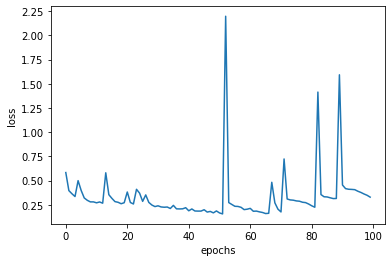

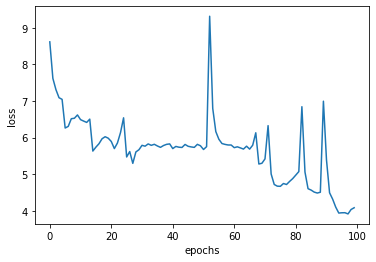

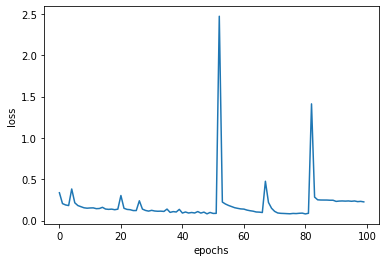

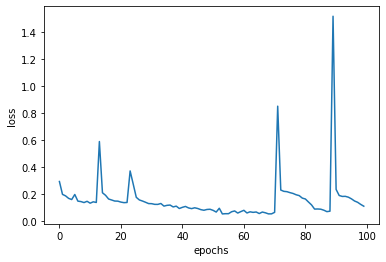

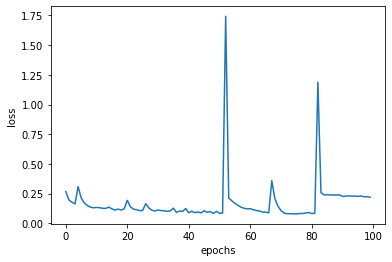

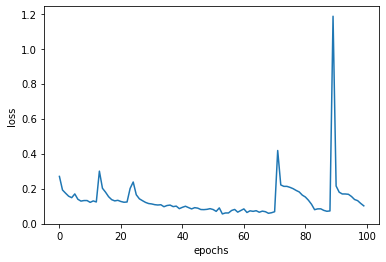

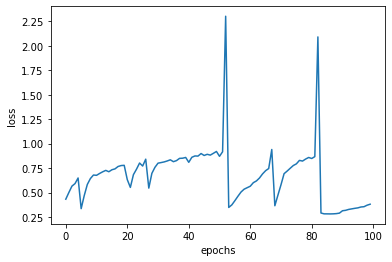

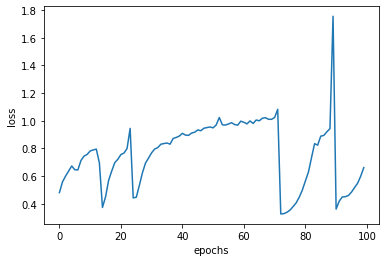

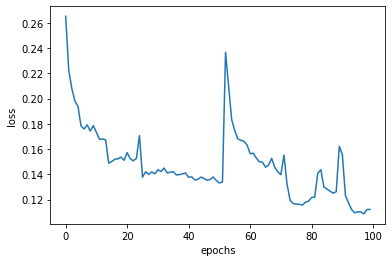

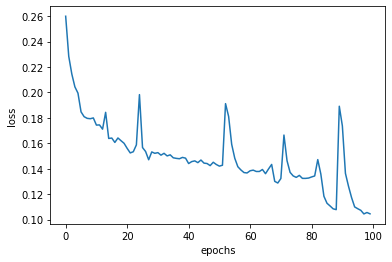

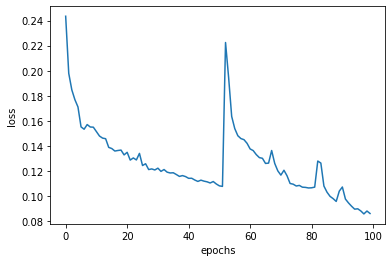

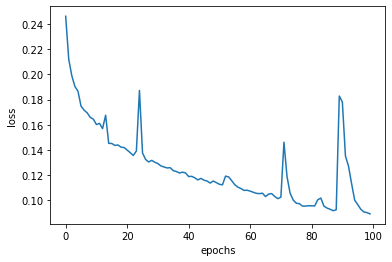

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(d_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'd_loss_epochs.pdf')

plt.figure(2)
plt.plot(g_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'g_loss_epochs.pdf')

plt.figure(3)
plt.plot(dX_rl_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'dX_rl_loss_epochs.pdf')

plt.figure(4)
plt.plot(dY_rl_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'dY_rl_loss_epochs.pdf')

plt.figure(5)
plt.plot(dX_fk_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'dX_fk_loss_epochs.pdf')

plt.figure(6)
plt.plot(dY_fk_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'dY_fk_loss_epochs.pdf')

plt.figure(7)
plt.plot(gX_adv_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gX_adv_loss_epochs.pdf')

plt.figure(8) 
plt.plot(gY_adv_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gY_adv_loss_epochs.pdf')

plt.figure(9)
plt.plot(gX_cycle_loss_epochs) 
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gX_cycle_loss_epochs.pdf')

plt.figure(10)
plt.plot(gY_cycle_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gY_cycle_loss_epochs.pdf')

plt.figure(11)
plt.plot(gX_identity_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gX_identity_loss_epochs.pdf')

plt.figure(12) 
plt.plot(gY_identity_loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('/content/gdrive/My Drive/Deep Learning/Project/saved_loss_cycleGAN_' + config.MODE +'/'+ 'gY_identity_loss_epochs.pdf')


2) **Testing**

*N.B.: The testing phase has been performed on a small amount of data, and images have been processed one by one. The following is thus a procedure to generate a translated image, an identity one and a cycle one from one original image only. A way of building test sets is however provided in the data.py file of the submitted archive.*

In [6]:
from generator import Generator
from discriminator import Discriminator

In [7]:
import torch

In [8]:
n_residuals = 9 if config.IMG_DIM >= 256 else 6
gen_X = Generator(n_residuals=n_residuals).to(config.DEVICE)
gen_Y = Generator(n_residuals=n_residuals).to(config.DEVICE)

checkpoint = torch.load(config.SAVE_MODEL_PATH)

In [9]:
gen_X.load_state_dict(checkpoint['gX_state_dict_'+ config.MODE])
gen_Y.load_state_dict(checkpoint['gY_state_dict_'+ config.MODE])

<All keys matched successfully>

In [10]:
gen_X.eval()
gen_Y.eval()

Generator(
  (model): Sequential(
    (0): GInitBlock(
      (conv): Sequential(
        (0): ReflectionPad2d((3, 3, 3, 3))
        (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
        (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
      )
    )
    (1): GDownsamplingBlock(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU(inplace=True)
      )
    )
    (2): GDownsamplingBlock(
      (conv): Sequential(
        (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (2): ReLU(inplace=True)
      )
    )
    (3): GResidualBlock(
      (conv): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Co

In [11]:
import torchvision.transforms as transforms

In [12]:
transform = config.TRANSFORM_LIST
t = transforms.Compose(transform[:3])

In [13]:
from PIL import Image

In [14]:
import numpy as np

The following cell depends on the organisation of the user's Drive. In ours, test images were identified as 'categID' (for instance: 'zebra3').

In [65]:
ID = 2
categ = 'zebra'

In [66]:
img_path = '/content/gdrive/My Drive/Deep Learning/Project/Data/'+categ+f'{ID}.jpg'
img = np.asarray(Image.open(img_path).convert('RGB'))

In [67]:
img = t(img)

In [68]:
import matplotlib.pyplot as plt

In [69]:
def show_images(img):
    img = img
    npimg = img.detach().numpy() * .5 + .5
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

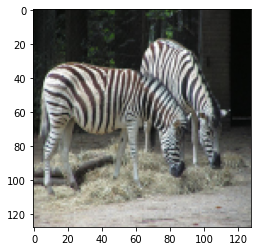

In [70]:
show_images(img)

In [71]:
from torchvision.utils import save_image

In [72]:
save_image(img*0.5+0.5, f'/content/gdrive/My Drive/Deep Learning/Project/Data/'+categ+f'{ID}_original.PNG')

In [73]:
img.size()

torch.Size([3, 128, 128])

In [74]:
img = img.unsqueeze(0)

In [75]:
img.size()

torch.Size([1, 3, 128, 128])

In [76]:
img = img.to(config.DEVICE)
new_img = gen_X(img)
identity = gen_Y(img)

In [77]:
new_img = new_img.cpu()
identity = identity.cpu()

In [78]:
new_img = torch.squeeze(new_img)
identity = torch.squeeze(identity)

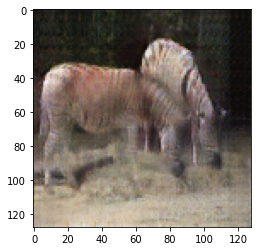

In [79]:
show_images(new_img)

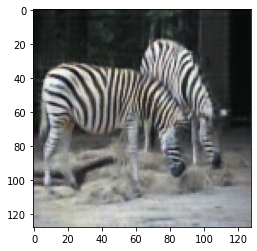

In [80]:
show_images(identity)

In the following cell, the name of the file should be changed regarding the transfer mode. For instance, in the case of a zebra to horse transfer, the 'horsed' part is convenient, but should be changed in other configurations to avoid misinterpretation.

In [81]:
save_image(new_img*0.5+0.5, f'/content/gdrive/My Drive/Deep Learning/Project/Data/'+categ+f'{ID}_horsed.PNG')

In [82]:
save_image(identity*0.5+0.5, f'/content/gdrive/My Drive/Deep Learning/Project/Data/'+categ+f'{ID}_identity.PNG')

In [83]:
new_img = new_img.unsqueeze(0)
new_img.size()

torch.Size([1, 3, 128, 128])

In [84]:
new_img = new_img.to(config.DEVICE)
cycle_img = gen_Y(new_img)
cycle_img = cycle_img.cpu()
cycle_img = torch.squeeze(cycle_img)
cycle_img.size()

torch.Size([3, 128, 128])

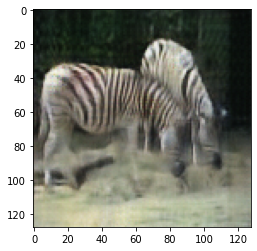

In [85]:
show_images(cycle_img)

In [86]:
save_image(cycle_img*0.5+0.5, f'/content/gdrive/My Drive/Deep Learning/Project/Data/'+categ+f'{ID}_cycle.PNG')

In [87]:
criterion = torch.nn.L1Loss()

In [88]:
img = img.cpu()
img = torch.squeeze(img)
img.size()

torch.Size([3, 128, 128])

In [89]:
criterion(img.cpu(), cycle_img.cpu())

tensor(0.1120, grad_fn=<L1LossBackward>)